<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/procesamiento_restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento del Dataset de Restaurantes
Este notebook realiza el análisis del dataset de restaurantes de Yelp, calculando las categorías más visitadas por usuario y evaluando métricas de diversidad como el Top-k por usuario.


In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset filtrado
#data_path = '/content/drive/MyDrive/IIC3633-2024-2/Restaurante/yelp_dataset/restaurant_sample.csv'
data_path = 'restaurant_sample.csv'
restaurant_data = pd.read_csv(data_path)

# Mostrar las primeras filas
print('Dataset cargado:')
restaurant_data.head()

Dataset cargado:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.191610,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
1,-_mCgBtlEGbzbTsjnuXm3Q,Little Caesars Pizza,5207 Walnut St,Philadelphia,PA,19139,39.957348,-75.225982,2.0,5,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Pizza, Restaurants",NaN
2,V41hJnfJSAad4L_YdVQBGQ,Zen Q,10807 Jasper Ave,Edmonton,AB,T5J 5G9,53.540780,-113.507118,4.0,12,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Desserts, Restaurants, Taiwanese, Bubble Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
3,-m_fl--6j4DFv1RlOtuL1g,Sukhothai Restaurant,11525 104 Avenue NW,Edmonton,AB,T5K 2S2,53.545830,-113.520614,3.0,24,0,"{'HasTV': 'False', 'RestaurantsReservations': ...","Thai, Restaurants","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
4,QYnfbwG2fDfuWAI6RbGz4g,Craft & Claw,126 Chestnut St,Philadelphia,PA,19106,39.948092,-75.143565,4.0,30,0,"{'OutdoorSeating': 'False', 'GoodForKids': 'Fa...","Seafood, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."


In [ ]:
# Dividir las categorías múltiples en filas separadas
restaurant_data_expanded = restaurant_data.assign(
    category=restaurant_data['categories'].str.split(', ')
).explode('category')

# Mostrar el dataset procesado
print('Dataset con categorías separadas:')
restaurant_data_expanded.head()

Dataset con categorías separadas:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,category
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.19161,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Food
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.19161,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Noodles
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.19161,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Specialty Food
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.19161,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Ethnic Food
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.19161,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Imported Food


In [ ]:
list(restaurant_data_expanded['category'].unique())

['Food',
 'Noodles',
 'Specialty Food',
 'Ethnic Food',
 'Imported Food',
 'Sushi Bars',
 'Restaurants',
 'Pizza',
 'Desserts',
 'Taiwanese',
 'Bubble Tea',
 'Thai',
 'Seafood',
 'American (New)',
 'Diners',
 'Breakfast & Brunch',
 'Cafes',
 'Delis',
 'Sandwiches',
 'Fast Food',
 'Grocery',
 'Bagels',
 'Bars',
 'Nightlife',
 'American (Traditional)',
 'Sports Bars',
 'Steakhouses',
 'Burgers',
 'Caribbean',
 'Salad',
 'Cocktail Bars',
 'Coffee & Tea',
 'Mediterranean',
 'Greek',
 'Moroccan',
 'Italian',
 'Pasta Shops',
 'Barbeque',
 'Comfort Food',
 'Tex-Mex',
 'Mexican',
 'Tacos',
 'Kebab',
 'Turkish',
 'Food Trucks',
 'Chicken Wings',
 'Asian Fusion',
 'Arts & Entertainment',
 'Active Life',
 'Arcades',
 'Kids Activities',
 'Indoor Playcentre',
 'Chicken Shop',
 'Pubs',
 'Hotels & Travel',
 'Beer Bar',
 'Bed & Breakfast',
 'Music Venues',
 'Indian',
 'Vegetarian',
 'Food Delivery Services',
 'Caterers',
 'Event Planning & Services',
 'Gluten-Free',
 'Chinese',
 'Venues & Event Spaces

In [5]:
def extract_relevant_category(categories):
    """
    Clasifica las categorías de negocios dentro de grupos jerárquicos relevantes.

    Args:
        categories (str): Lista de categorías separadas por comas.

    Returns:
        str: La categoría más relevante del negocio o 'Other' si no encaja en ninguna categoría relevante.
    """
    # Diccionario de grupos de categorías
    category_groups = {
        "Asian Cuisine": [
            "Japanese", "Chinese", "Korean", "Vietnamese", "Thai", "Taiwanese", "Sushi Bars", "Ramen", "Dim Sum",
            "Laotian", "Shanghainese", "Cantonese", "Szechuan", "Himalayan/Nepalese", "Pan Asian", "Hot Pot", "Teppanyaki"
        ],
        "European Cuisine": [
            "Italian", "French", "Spanish", "Greek", "Mediterranean", "Turkish", "German", "Portuguese", "Basque",
            "Belgian", "Austrian", "Sicilian", "Polish", "Ukrainian", "Russian", "Hungarian", "Scandinavian", "Modern European"
        ],
        "American Cuisine": [
            "American (New)", "American (Traditional)", "Southern", "Soul Food", "Diners", "Tex-Mex", "Barbeque",
            "Steakhouses", "Burgers", "Comfort Food", "Canadian (New)"
        ],
        "Latin Cuisine": [
            "Mexican", "Cuban", "Peruvian", "Argentine", "Colombian", "Brazilian", "Puerto Rican", "Honduran",
            "Dominican", "Latin American", "Empanadas", "New Mexican Cuisine"
        ],
        "Middle Eastern & African Cuisine": [
            "Middle Eastern", "Lebanese", "Persian/Iranian", "Ethiopian", "Moroccan", "African", "South African", "Kebab"
        ],
        "Beverages & Desserts": [
            "Coffee & Tea", "Bubble Tea", "Tea Rooms", "Ice Cream & Frozen Yogurt", "Gelato", "Cupcakes", "Donuts",
            "Cocktail Bars", "Beer Bar", "Wine Bars", "Tiki Bars", "Juice Bars & Smoothies", "Shaved Ice", "Waffles"
        ],
        "Fast Food & Chains": [
            "Fast Food", "Pizza", "Chicken Wings", "Hot Dogs", "Sandwiches", "Wraps", "Bagels", "Food Trucks",
            "Fish & Chips", "Tacos", "Pasta Shops", "Buffets"
        ],
        "Vegetarian & Specialty Diets": [
            "Vegetarian", "Vegan", "Gluten-Free", "Kosher", "Live/Raw Food", "Halal"
        ],
        "Other International Cuisine": [
            "Indian", "Pakistani", "Afghan", "Hawaiian", "Filipino", "Malaysian", "Indonesian", "Israeli",
            "Australian", "Syrian", "Brazilian", "Cambodian", "Haitian", "Vietnamese"
        ],
        "General Food & Services": [
            "Food", "Ethnic Food", "Specialty Food", "Imported Food", "Grocery", "Farmers Market", "Meat Shops",
            "Food Stands", "Cheese Shops", "Beverage Store", "Seafood Markets", "Do-It-Yourself Food", "Restaurant Supplies",
            "Catering", "Food Delivery Services"
        ],
        "Entertainment & Nightlife": [
            "Bars", "Nightlife", "Pubs", "Dive Bars", "Music Venues", "Dance Clubs", "Karaoke", "Comedy Clubs",
            "Speakeasies", "Wine Tasting Room", "Beer Gardens", "Lounges"
        ]
    }

    if not categories or not isinstance(categories, str):
        return 'Other'  # Retorna 'Other' si no hay categorías válidas

    # Dividir las categorías en una lista
    category_list = [cat.strip() for cat in categories.split(',')]

    # Buscar la categoría más relevante
    for main_group, subcategories in category_groups.items():
        for category in category_list:
            if category in subcategories:
                return main_group

    # Si no hay coincidencias, retornar 'Other'
    return 'Other'


In [6]:
restaurant_data['relevant_category'] = restaurant_data['categories'].apply(extract_relevant_category)

In [7]:
restaurant_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,relevant_category
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.191610,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Asian Cuisine
1,-_mCgBtlEGbzbTsjnuXm3Q,Little Caesars Pizza,5207 Walnut St,Philadelphia,PA,19139,39.957348,-75.225982,2.0,5,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Pizza, Restaurants",NaN,Fast Food & Chains
2,V41hJnfJSAad4L_YdVQBGQ,Zen Q,10807 Jasper Ave,Edmonton,AB,T5J 5G9,53.540780,-113.507118,4.0,12,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Desserts, Restaurants, Taiwanese, Bubble Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",Asian Cuisine
3,-m_fl--6j4DFv1RlOtuL1g,Sukhothai Restaurant,11525 104 Avenue NW,Edmonton,AB,T5K 2S2,53.545830,-113.520614,3.0,24,0,"{'HasTV': 'False', 'RestaurantsReservations': ...","Thai, Restaurants","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",Asian Cuisine
4,QYnfbwG2fDfuWAI6RbGz4g,Craft & Claw,126 Chestnut St,Philadelphia,PA,19106,39.948092,-75.143565,4.0,30,0,"{'OutdoorSeating': 'False', 'GoodForKids': 'Fa...","Seafood, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",Other


In [8]:
restaurant_data['relevant_category'].unique()

array(['Asian Cuisine', 'Fast Food & Chains', 'Other', 'American Cuisine',
       'European Cuisine', 'General Food & Services', 'Latin Cuisine',
       'Vegetarian & Specialty Diets', 'Beverages & Desserts',
       'Entertainment & Nightlife', 'Middle Eastern & African Cuisine',
       'Other International Cuisine'], dtype=object)

In [9]:
# Filtramos por los Other
restaurant_data_filtrado = restaurant_data[restaurant_data['relevant_category'] != 'Other']

restaurant_data_filtrado

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,relevant_category
0,11HXgzo47w5e5pziFXpTNg,Market 16 Noodle Bar,34TH Market St,Philadelphia,PA,19104,39.955696,-75.191610,1.5,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Noodles, Specialty Food, Ethnic Food, Im...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",Asian Cuisine
1,-_mCgBtlEGbzbTsjnuXm3Q,Little Caesars Pizza,5207 Walnut St,Philadelphia,PA,19139,39.957348,-75.225982,2.0,5,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Pizza, Restaurants",NaN,Fast Food & Chains
2,V41hJnfJSAad4L_YdVQBGQ,Zen Q,10807 Jasper Ave,Edmonton,AB,T5J 5G9,53.540780,-113.507118,4.0,12,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Desserts, Restaurants, Taiwanese, Bubble Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",Asian Cuisine
3,-m_fl--6j4DFv1RlOtuL1g,Sukhothai Restaurant,11525 104 Avenue NW,Edmonton,AB,T5K 2S2,53.545830,-113.520614,3.0,24,0,"{'HasTV': 'False', 'RestaurantsReservations': ...","Thai, Restaurants","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",Asian Cuisine
5,0RuvlgTnKFbX3IK0ZOOocA,Green Eggs Café,212 S 13th St,Philadelphia,PA,19107,39.948123,-75.162463,4.0,2679,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Diners, Breakfast...","{'Monday': '9:0-15:0', 'Tuesday': '9:0-15:0', ...",American Cuisine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51758,mKKuShu5EQolhOeih90V4w,Brewsters Brewing Company & Restaurant,2335 111th Street NW,Edmonton,AB,T6J 5E5,53.454880,-113.515076,3.0,42,0,"{'Caters': 'False', 'OutdoorSeating': 'True', ...","Food, Nightlife, American (New), Bars, America...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-0:0...",American Cuisine
51759,-_oHNNTvb4gC1PXWHG8tVw,Raceway Pub,9104 Crawfordsville Rd,Indianapolis,IN,46234,39.816325,-86.323270,3.5,17,1,"{'RestaurantsDelivery': 'True', 'RestaurantsAt...","Nightlife, Pubs, Burgers, Bars, Restaurants, P...","{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",American Cuisine
51760,b36EeutJRvowZMr9TpQm0w,Lighthouse Coffee,"5255 Vista Blvd, Ste C-2",Sparks,NV,89436,39.586883,-119.716406,4.5,238,1,"{'WiFi': ""u'free'"", 'BusinessParking': ""{'gara...","Food, Juice Bars & Smoothies, Restaurants, Cof...","{'Monday': '6:0-18:0', 'Tuesday': '6:0-18:0', ...",Beverages & Desserts
51761,__Jhyl5p8bfnnYOGjwPtsg,Al-Sham Restaurant,201 W Boise Ave,Boise,ID,83706,43.585883,-116.183792,4.0,19,0,"{'RestaurantsPriceRange2': '1', 'HasTV': 'True...","Arabic, Mediterranean, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",European Cuisine


Descargar la data de review de cada usuario he identificarlo por usuario

In [10]:
# Cargar el dataset filtrado
data_path = '/content/drive/MyDrive/IIC3633-2024-2/Restaurante/yelp_dataset/review_sample.csv'
#data_path = 'review_sample.csv'

review_data = pd.read_csv(data_path)

# Mostrar las primeras filas
print('Dataset cargado:')
review_data.head()

Dataset cargado:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [11]:
# Unir las reseñas con los restaurantes filtrados usando business_id
data_restaurante_user = pd.merge(review_data, restaurant_data, on='business_id', how='inner')

# Mostrar una muestra de los datos combinados
data_restaurante_user.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,relevant_category
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",American Cuisine
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN,Other
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...",Vegetarian & Specialty Diets
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...",American Cuisine
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,19147,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30...",European Cuisine


In [ ]:
# Guardar los datos combinados en un archivo CSV
data_restaurante_user.to_csv('/content/drive/MyDrive/IIC3633-2024-2/Restaurante/yelp_dataset/data_restaurante_user.csv', index=False)


In [ ]:
# Cargar el data_restaurante_user
data_path = '/content/drive/MyDrive/IIC3633-2024-2/Restaurante/yelp_dataset/data_restaurante_user.csv'

data_restaurante_user = pd.read_csv(data_path)


In [12]:
# Seleccionar columnas relevantes
data_restaurante_user = data_restaurante_user[['user_id', 'business_id', 'stars_x', 'text', 'date', 'name', 'categories', 'relevant_category']]

# Mostrar las primeras filas del nuevo DataFrame
data_restaurante_user.head()

,user_id,business_id,stars_x,text,date,name,categories,relevant_category
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",American Cuisine
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,"Restaurants, Breakfast & Brunch",Other
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,"Halal, Pakistani, Restaurants, Indian",Vegetarian & Specialty Diets
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",American Cuisine
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,"Mediterranean, Restaurants, Seafood, Greek",European Cuisine


In [13]:
# Agrupar por usuario la tabla data_restaurante_user para tener el promedio stars
mean_stars_per_user = data_restaurante_user.groupby('user_id')['stars_x'].mean()

# Hacemos un round a la decima
mean_stars_per_user = mean_stars_per_user.round(1)

# Ahora agregamos la columna mean_stars a la tabla data_restaurante_user
data_restaurante_user['mean_stars'] = data_restaurante_user['user_id'].map(mean_stars_per_user)
data_restaurante_user

,user_id,business_id,stars_x,text,date,name,categories,relevant_category,mean_stars
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",American Cuisine,4.0
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,"Restaurants, Breakfast & Brunch",Other,4.3
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,"Halal, Pakistani, Restaurants, Indian",Vegetarian & Specialty Diets,4.8
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",American Cuisine,3.0
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,"Mediterranean, Restaurants, Seafood, Greek",European Cuisine,1.0
...,...,...,...,...,...,...,...,...,...
4675750,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5.0,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34,Wendy's,"Restaurants, Burgers, Food, Fast Food",American Cuisine,4.1
4675751,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01,Lark,"Bars, Restaurants, American (New), Beer Bar, N...",American Cuisine,3.2
4675752,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,Marhaba,"Halal, Lebanese, Mediterranean, Greek, Restaur...",European Cuisine,4.1
4675753,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,Sauce on the Side,"Desserts, Pizza, Salad, Food, Beer, Wine & Spi...",European Cuisine,4.3


In [14]:
# Filtramos por todos los stars_x que sean mayor o igual a mean_stars
data_restaurante_user_filtrado = data_restaurante_user[data_restaurante_user['stars_x'] >= data_restaurante_user['mean_stars']]
data_restaurante_user_filtrado

,user_id,business_id,stars_x,text,date,name,categories,relevant_category,mean_stars
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,"Halal, Pakistani, Restaurants, Indian",Vegetarian & Specialty Diets,4.8
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",American Cuisine,3.0
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,"Mediterranean, Restaurants, Seafood, Greek",European Cuisine,1.0
5,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Fries Rebellion,"Beer Bar, Bars, American (New), Gastropubs, Re...",American Cuisine,5.0
8,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,Brio Italian Grille,"Bars, Pizza, Nightlife, Cocktail Bars, Italian...",European Cuisine,4.0
...,...,...,...,...,...,...,...,...,...
4675743,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0,I've been to the other Federal Donuts location...,2012-10-13 14:39:37,Federal Donuts,"Donuts, Sandwiches, Soul Food, Food, Coffee & ...",American Cuisine,4.0
4675745,QYZM8lgZn2HL_OWYAn7E1A,nrXtCSdfWg0TJ86onEZWkg,4.0,Took a colleague here for dinner as we were tr...,2018-02-13 19:50:01,The Company Burger,"Burgers, Restaurants, American (Traditional)",American Cuisine,4.0
4675750,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5.0,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34,Wendy's,"Restaurants, Burgers, Food, Fast Food",American Cuisine,4.1
4675751,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01,Lark,"Bars, Restaurants, American (New), Beer Bar, N...",American Cuisine,3.2


In [22]:
# Ver cuantas categorias tiene el usario ---2PmXbF47D870stH1jqA distintas
data_restaurante_user_filtrado[data_restaurante_user_filtrado['user_id'] == '---2PmXbF47D870stH1jqA']['relevant_category'].unique()

array(['American Cuisine', 'Latin Cuisine', 'European Cuisine'],
      dtype=object)

In [16]:
# Configurar el valor de k
k = 3

# Seleccionar las columnas necesarias
user_category_df = data_restaurante_user_filtrado[['user_id', 'relevant_category']]

# Calcular las k categorías más visitadas por cada usuario
top_3_categories = (
    user_category_df.groupby(['user_id', 'relevant_category'])
    .size()  # Contar ocurrencias de cada categoría por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['user_id', 'count'], ascending=[True, False])  # Ordenar por usuario y conteo
    .groupby('user_id')  # Agrupar por usuario
    .head(k)  # Tomar las k categorías más vistas por usuario
)

# Mostrar los resultados
print(f'Top {k} categorías más visitadas por usuario:')
top_3_categories

Top 3 categorías más visitadas por usuario:


,user_id,relevant_category,count
0,---2PmXbF47D870stH1jqA,American Cuisine,15
1,---2PmXbF47D870stH1jqA,European Cuisine,6
2,---2PmXbF47D870stH1jqA,Latin Cuisine,1
3,---UgP94gokyCDuB5zUssA,American Cuisine,2
5,---UgP94gokyCDuB5zUssA,European Cuisine,2
...,...,...,...
2133650,zzz-M4QvkEpUWWPL9RTzLA,European Cuisine,1
2133651,zzzCg-_lpyYE82TlJCdwdw,Fast Food & Chains,1
2133652,zzzGgfvrSJ4AQeKtcgocIw,European Cuisine,1
2133653,zzzMBVS73g3ZJ7qL8JyhiA,American Cuisine,1


In [17]:
# Configurar el valor de k
k = 5

# Seleccionar las columnas necesarias
user_category_df = data_restaurante_user_filtrado[['user_id', 'relevant_category']]

# Calcular las k categorías más visitadas por cada usuario
top_5_categories = (
    user_category_df.groupby(['user_id', 'relevant_category'])
    .size()  # Contar ocurrencias de cada categoría por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['user_id', 'count'], ascending=[True, False])  # Ordenar por usuario y conteo
    .groupby('user_id')  # Agrupar por usuario
    .head(k)  # Tomar las k categorías más vistas por usuario
)

# Mostrar los resultados
print(f'Top {k} categorías más visitadas por usuario:')
top_5_categories

Top 5 categorías más visitadas por usuario:


,user_id,relevant_category,count
0,---2PmXbF47D870stH1jqA,American Cuisine,15
1,---2PmXbF47D870stH1jqA,European Cuisine,6
2,---2PmXbF47D870stH1jqA,Latin Cuisine,1
3,---UgP94gokyCDuB5zUssA,American Cuisine,2
5,---UgP94gokyCDuB5zUssA,European Cuisine,2
...,...,...,...
2133650,zzz-M4QvkEpUWWPL9RTzLA,European Cuisine,1
2133651,zzzCg-_lpyYE82TlJCdwdw,Fast Food & Chains,1
2133652,zzzGgfvrSJ4AQeKtcgocIw,European Cuisine,1
2133653,zzzMBVS73g3ZJ7qL8JyhiA,American Cuisine,1


In [18]:
# Configurar el valor de k
k = 7

# Seleccionar las columnas necesarias
user_category_df = data_restaurante_user_filtrado[['user_id', 'relevant_category']]

# Calcular las k categorías más visitadas por cada usuario
top_7_categories = (
    user_category_df.groupby(['user_id', 'relevant_category'])
    .size()  # Contar ocurrencias de cada categoría por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['user_id', 'count'], ascending=[True, False])  # Ordenar por usuario y conteo
    .groupby('user_id')  # Agrupar por usuario
    .head(k)  # Tomar las k categorías más vistas por usuario
)

# Mostrar los resultados
print(f'Top {k} categorías más visitadas por usuario:')
top_7_categories

Top 7 categorías más visitadas por usuario:


,user_id,relevant_category,count
0,---2PmXbF47D870stH1jqA,American Cuisine,15
1,---2PmXbF47D870stH1jqA,European Cuisine,6
2,---2PmXbF47D870stH1jqA,Latin Cuisine,1
3,---UgP94gokyCDuB5zUssA,American Cuisine,2
5,---UgP94gokyCDuB5zUssA,European Cuisine,2
...,...,...,...
2133650,zzz-M4QvkEpUWWPL9RTzLA,European Cuisine,1
2133651,zzzCg-_lpyYE82TlJCdwdw,Fast Food & Chains,1
2133652,zzzGgfvrSJ4AQeKtcgocIw,European Cuisine,1
2133653,zzzMBVS73g3ZJ7qL8JyhiA,American Cuisine,1


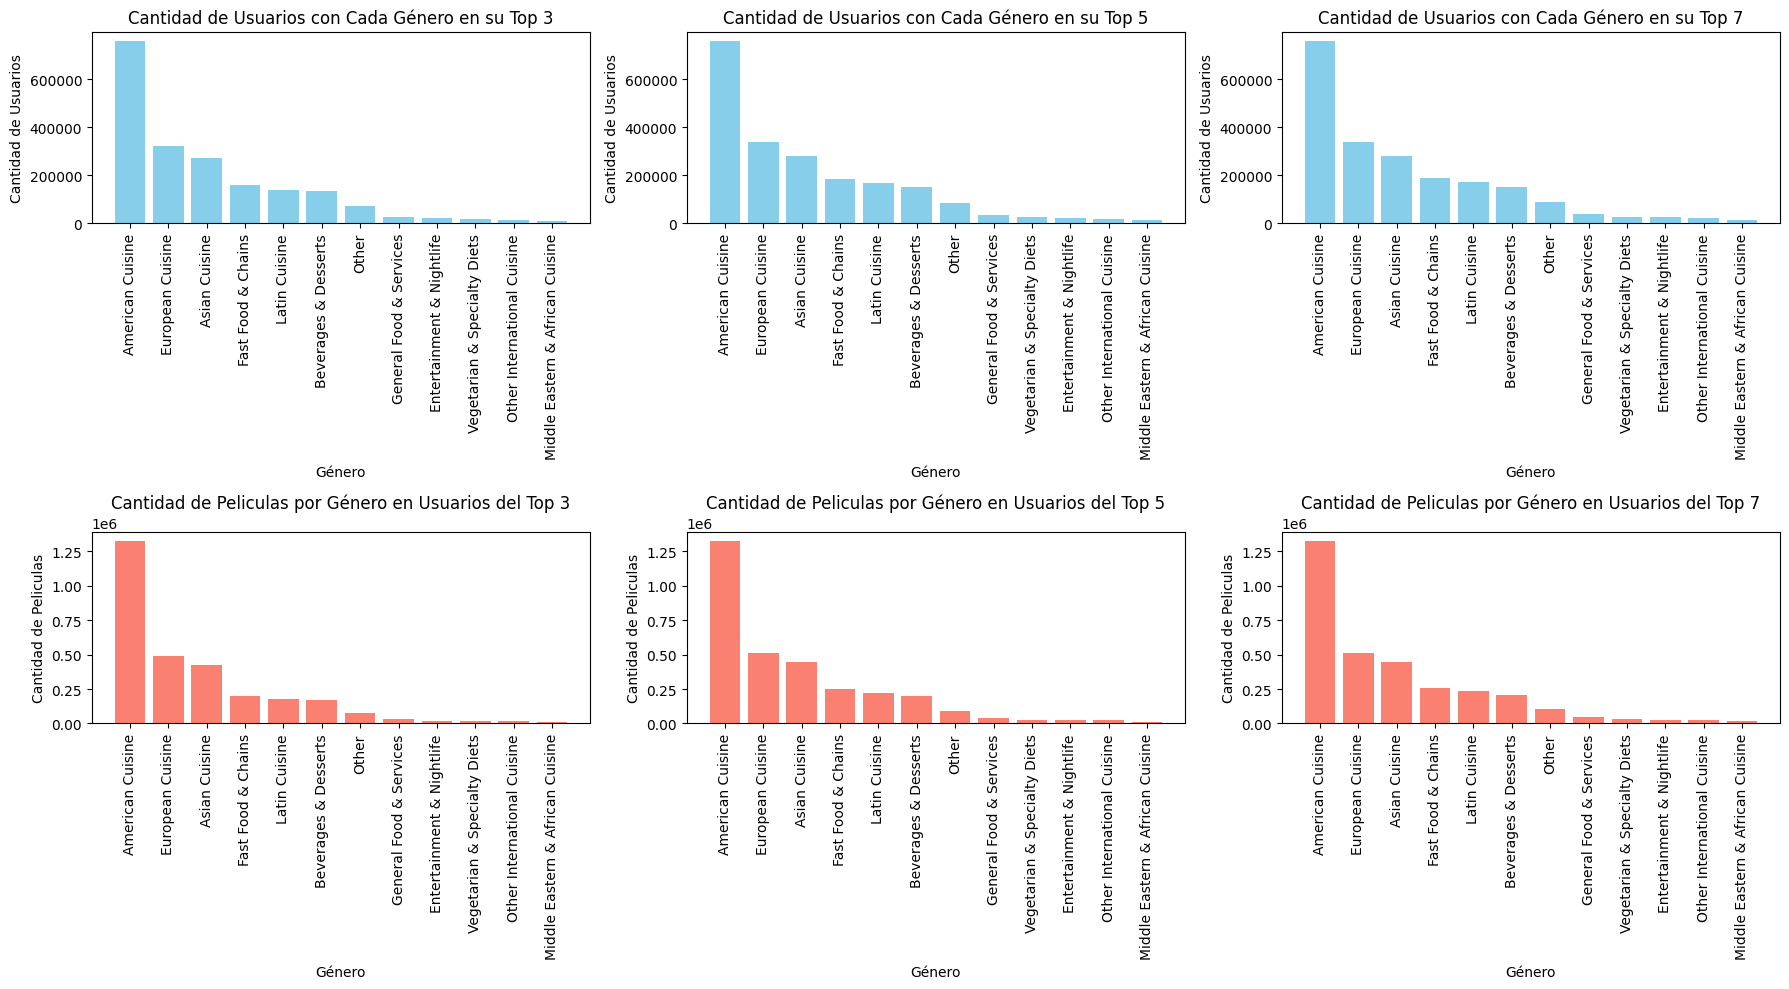

In [23]:
import matplotlib.pyplot as plt

# Lista de DataFrames y valores de K para iterar
top_k_dfs = [top_3_categories, top_5_categories, top_7_categories]
k_values = [3, 5, 7]

# Crear la figura y los ejes para la grilla de gráficos (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (top_k_df, k) in enumerate(zip(top_k_dfs, k_values)):
    # Gráfico 1: Cantidad de usuarios que tienen cada género en su top K
    genre_user_count = top_k_df['relevant_category'].value_counts()
    axes[0, i].bar(genre_user_count.index, genre_user_count.values, color='skyblue')
    axes[0, i].set_title(f"Cantidad de Usuarios con Cada Género en su Top {k}")
    axes[0, i].set_xlabel("Género")
    axes[0, i].set_ylabel("Cantidad de Usuarios")
    axes[0, i].tick_params(axis='x', rotation=90)

    # Agrupar por genero principal para saber la cantidad de peliculas tiene el top k
    group_movie_by_genre = top_k_df.groupby('relevant_category')['count'].sum()
    # Ordenar por values
    group_movie_by_genre = group_movie_by_genre.sort_values(ascending=False)

    # Gráfico 2: Cantidad de peliculas por género en usuarios del top K
    axes[1, i].bar(group_movie_by_genre.index, group_movie_by_genre.values, color='salmon')
    axes[1, i].set_title(f"Cantidad de Peliculas por Género en Usuarios del Top {k}")
    axes[1, i].set_xlabel("Género")
    axes[1, i].set_ylabel("Cantidad de Peliculas")
    axes[1, i].tick_params(axis='x', rotation=90)

# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()


La cantidad de generos no se modifica orque usualmente por usuario se recomiendan un maximo de 3 categorias